In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
from scipy.signal import lfilter
from scipy.io.wavfile import read

In [ ]:
def get_source(T, dur, fs):
    Ts = int(T * fs)
    Tp = int(0.4 * Ts)
    Tn = int(0.16 * Ts)
    fp = [3 * (t / Tp) ** 2 - 2 * (t / Tp) ** 3 for t in range(Tp)]
    fn = [1 - ((t - Tp) / Tn) ** 2 for t in range(Tp, Tp + Tn)]
    f0 = [0 for t in range(Tp + Tn, Ts)]
    pulse = fp + fn + f0
    return pulse * int(dur / T)

In [ ]:
src = get_source(1 / 150, 1, 22050)

In [ ]:
!wget http://www.phys.unsw.edu.au/~jw/speech/heardNormalegg.wav

In [ ]:
fs, src = read("heardNormalegg.wav")

In [ ]:
src = src[:, 1]  # правый канал

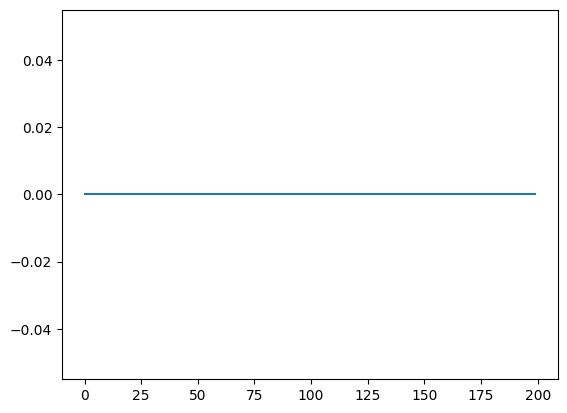

In [ ]:
plt.plot(src[:200])
plt.show()

In [ ]:
Audio(src, rate=fs)

In [ ]:
def filter_source(src, bw, f, fs):
    a2 = np.exp(-2 * np.pi * bw / fs)  # c
    a1 = -2 * np.exp(-np.pi * bw / fs) * np.cos(2 * np.pi * f / fs)  # b
    a0 = 1  # a
    return lfilter([1], [a0, a1, a2], src)

In [ ]:
formants = [310, 1050, 2880, 3500]
bandwidths = [50, 100, 280, 150]
res = src
for f, bw in zip(formants, bandwidths):
    res = filter_source(res, bw, f, fs)

In [ ]:
src

[0.0,
 0.0008815449587928983,
 0.003485177744064947,
 0.007749395219156178,
 0.013612694247406616,
 0.021013571692156303,
 0.029890524416745255,
 0.04018204928451352,
 0.051826643158801096,
 0.06476280290294804,
 0.07892902538029441,
 0.09426380745418014,
 0.11070564598794538,
 0.1281930378449301,
 0.14666447988847434,
 0.16605846898191812,
 0.18631350198860142,
 0.2073680757718643,
 0.22916068719504695,
 0.2516298331214892,
 0.27471401041453114,
 0.2983517159375128,
 0.3224814465537742,
 0.3470416991266555,
 0.3719709705194965,
 0.39720775759563726,
 0.4226905572184182,
 0.44835786625117885,
 0.4741481815572596,
 0.5,
 0.5258518184427406,
 0.5516421337488211,
 0.5773094427815818,
 0.6027922424043626,
 0.6280290294805033,
 0.6529583008733445,
 0.6775185534462257,
 0.7016482840624874,
 0.7252859895854687,
 0.7483701668785109,
 0.7708393128049531,
 0.7926319242281356,
 0.8136864980113986,
 0.8339415310180819,
 0.8533355201115256,
 0.87180696215507,
 0.8892943540120546,
 0.905736192545819

In [ ]:
Audio(res, rate=fs)

In [ ]:
def get_noise_source(dur, fs):
    noise = np.random.normal(0, 1, int(fs * dur))
    return noise / max(noise)

In [ ]:
noise = get_noise_source(1, 22050)

In [ ]:
Audio(noise, rate=22050)

In [ ]:
formants = [737, 1557, 2500, 3500]
bandwidths = [50, 75, 100, 150]
res = noise
fs = 22050
for f, bw in zip(formants, bandwidths):
    res = filter_source(res, bw, f, fs)

In [ ]:
Audio(res, rate=22050)

In [ ]:
!git clone https://github.com/guestdaniel/tdklatt.git

Cloning into 'tdklatt'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66
Receiving objects: 100% (66/66), 27.29 KiB | 9.10 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
%cd tdklatt

/content/tdklatt


In [ ]:
!pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2054406 sha256=797a6256727c8927d2721eb971258e8f81895e92339e39aa7b1cf05a0414bd50
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio


In [ ]:
!python tdklatt.py

/content/tdklatt/tdklatt.py:77: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if param is "FF" or param is "BW":
/content/tdklatt/tdklatt.py:77: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if param is "FF" or param is "BW":
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
Traceback (most recent call last):
  File "/content/tdklatt/tdklatt.py", line 120